### Project Id -"PTID-CDS-AUG-24-2049"

### Project Name - PRCP-1025-FLIGHT PRICE PREDICTION           

### PROBLEM STATEMENT
* Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain.

#### Import The Basic Libraries
1. since data is in form of excel file we have to use pandas read_excel to load the data
2. After loading it is important to check the complete information of data as it can indication many of the hidden information such
   as null values in a coulumn or a row
3. check whether any null values are there or not, if it is present then following can be done.
4. imputing data using imputation method sklearn
5. Filling NaN values with mean, meadian and mode using fillna() method
6. Describe data--> which can give statistical analysis
  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()


sns.set()

In [2]:
data = pd.read_excel('flight fare/Flight_Fare.xlsx')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
 data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Domain Analysis
* Airline: Serves as a categorical representation of various airline companies.
* Date_of_Journey: Denotes the specific dates on which travel occurs, and is crucial for recognizing patterns and trends in ticket prices over time.
* Source: Represents the departure locations or cities for airline journeys.
* Destination: Signifies the arrival locations or cities for airline journeys.
* Route: Outlines the specific flight paths or itineraries for airline journeys.
* Dep_Time: Records the departure times for airline flights. This temporal data is essential for price prediction models as it helps capture variations in ticket prices based on different departure times throughout the day.
* Arrival_Time: Denotes the times at which airline flights are scheduled to arrive at their destinations. This temporal information is crucial for price prediction models as it contributes to understanding how arrival times may influence ticket prices.
* Duration: Represents the total time taken for airline flights, typically measured in hours and minutes.
* Total_stops: indicates the number of layovers or stops a flight has during its journey.
* Additional_Info: Mentions various information about the journey including but not limited to BusinessClass,Changing Airports, Meals provided, Layovers etc.
* Price: Serves as the target variable for price prediction models. This numerical data represents the cost of airline tickets.
        

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
data.shape

(10683, 11)

In [8]:
data["Duration"].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

* There are 10683 entries in given dataserp

In [11]:
data.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4536,4536,2376,233,423,550,5625,8344


* The dataset contains information about multiple airlines, with Jet Airways being the most frequent, appearing 3,849 times.

In [12]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

* There are 12 different airline

In [13]:
data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

* ##### Some of the Airlines have very low frequency

In [14]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

* ##### More than 80% of Additional_Info belongs to 'No info'

In [15]:
#given the maxium price in each Airline descreasing order
data.groupby('Airline').agg({'Price':'max'}).sort_values(by='Price', ascending=False)

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


In [16]:
data.duplicated().sum()

220

* ##### we must drop this in preprocessing

## Explore Data Analysis(EDA)

#### Univariate Analysis

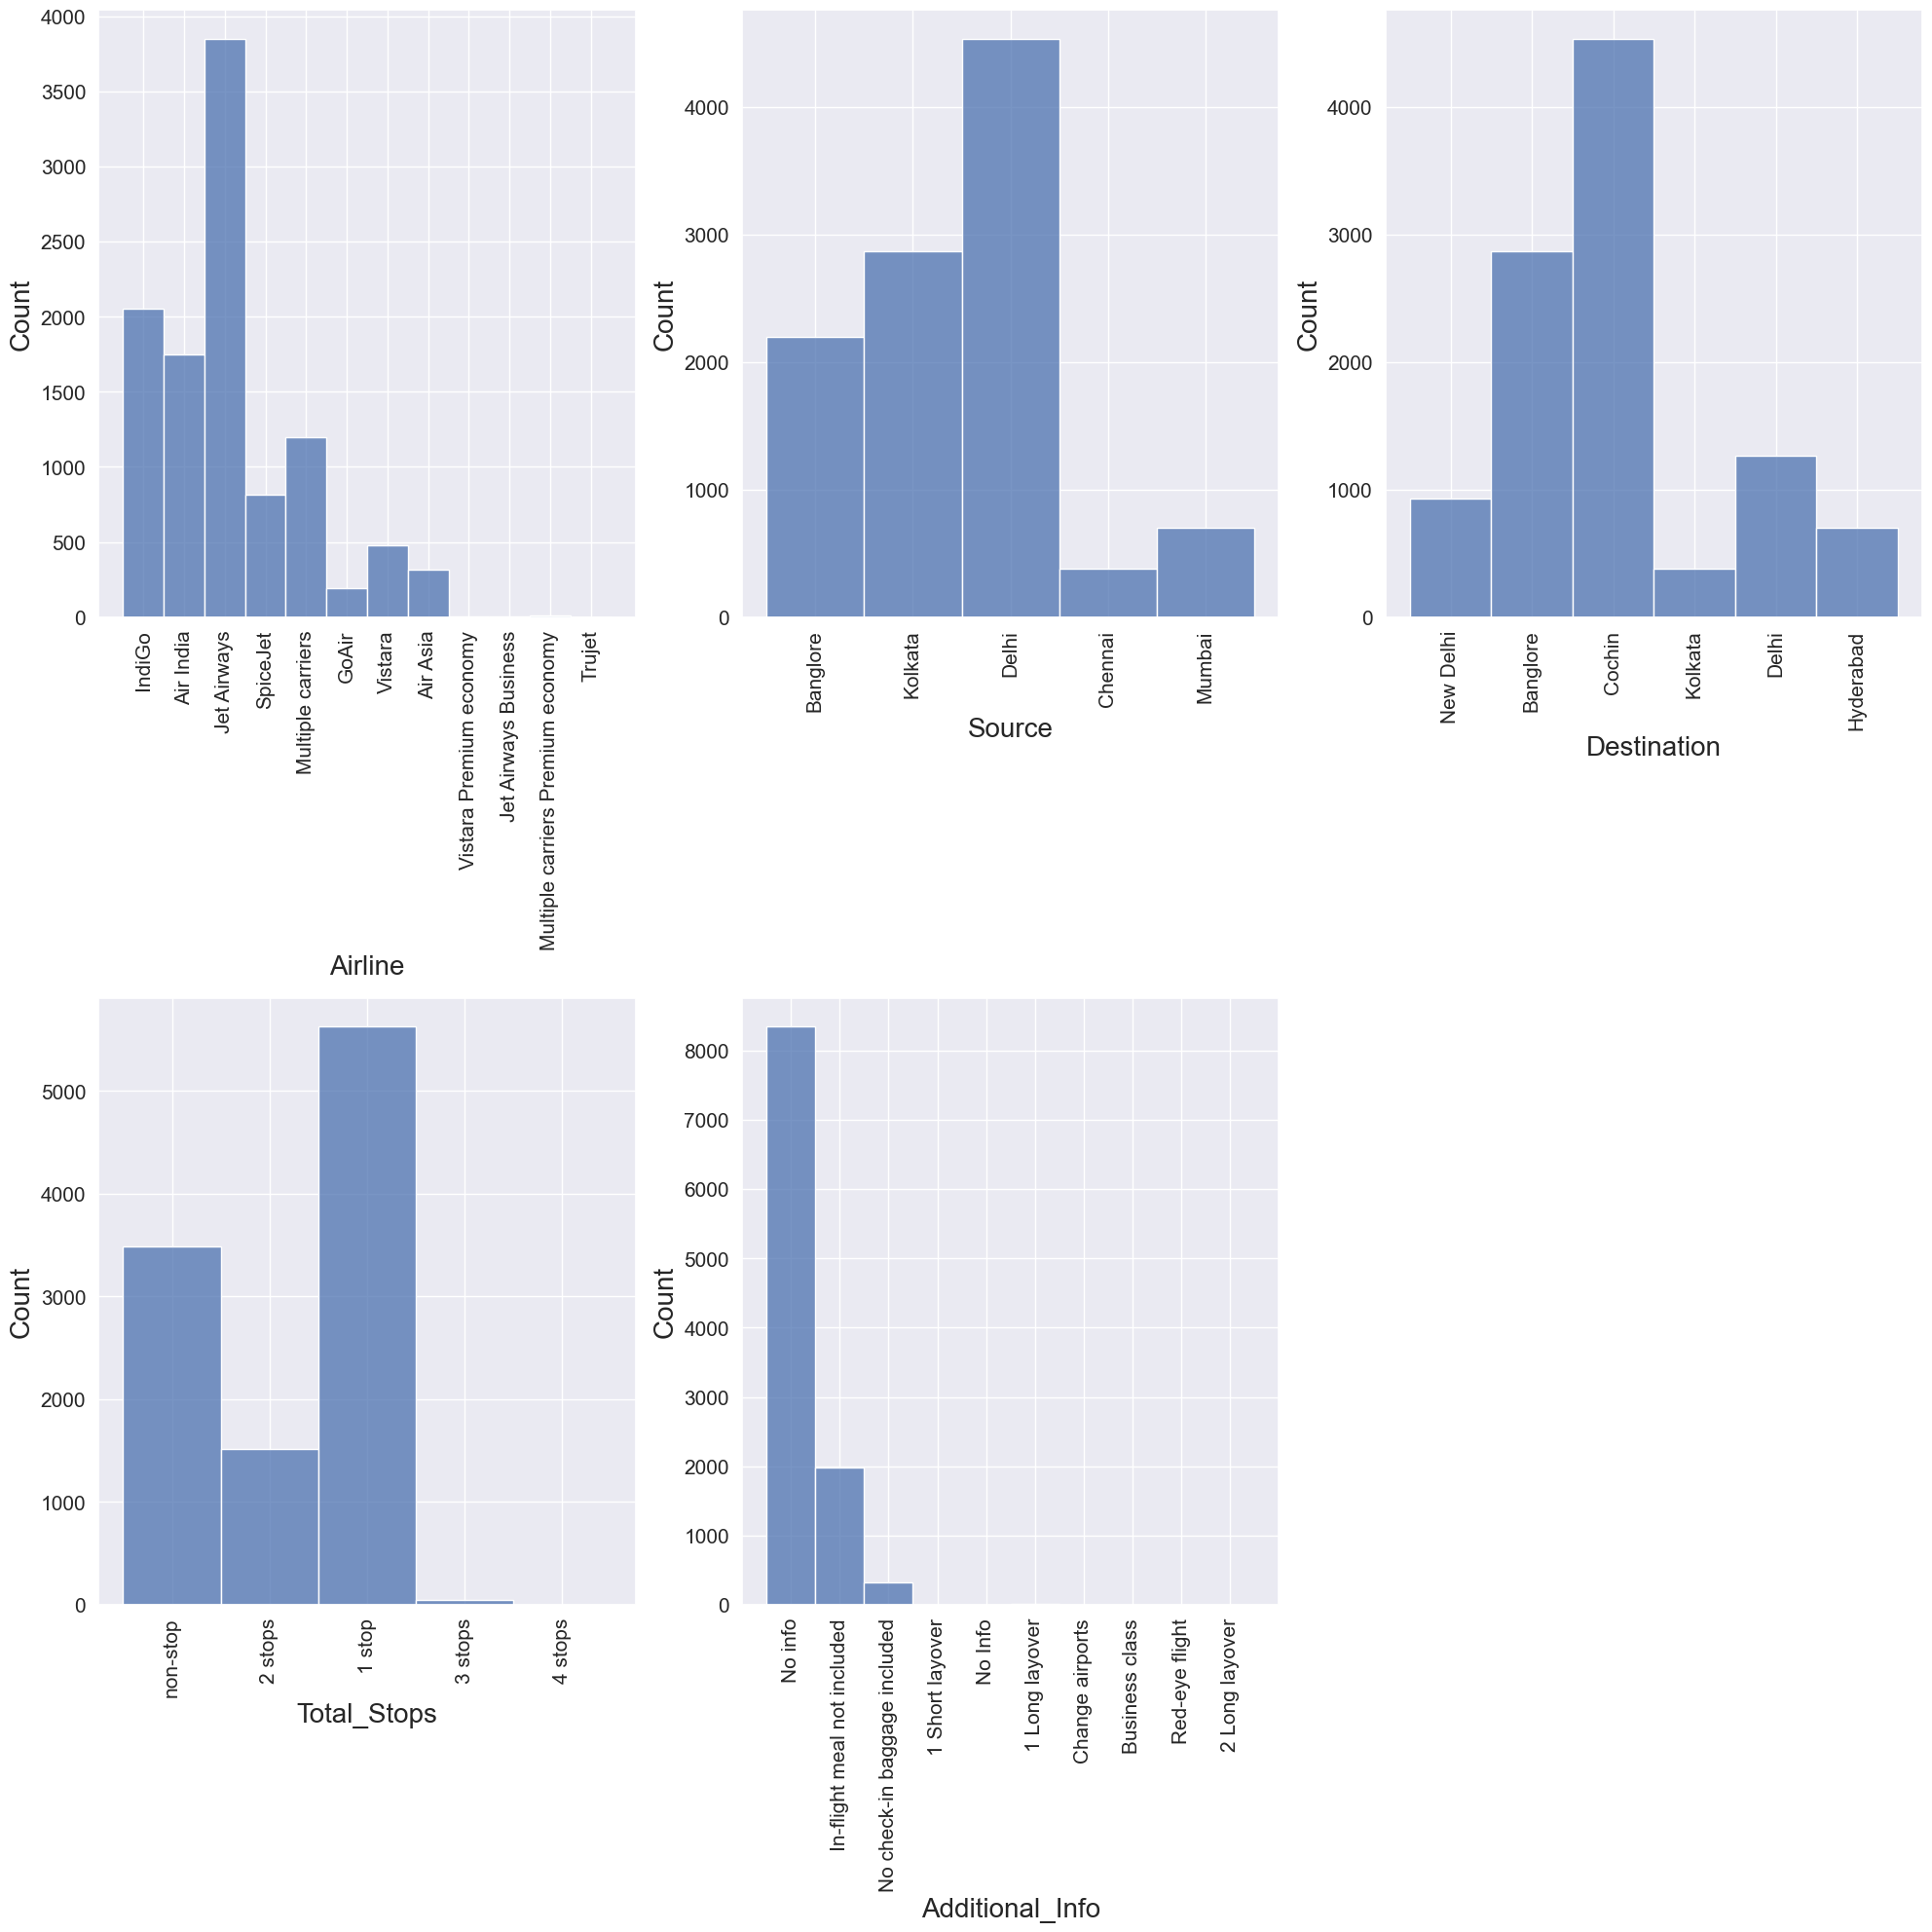

In [17]:
plt.figure(figsize=(20,20))
plotnumber=1
for column in data[['Airline',  'Source', 'Destination', 'Total_Stops','Additional_Info']]:  # Only taking the categorical columns
  ax=plt.subplot(2,3,plotnumber)
  sns.histplot(data[column],bins="auto")
  plt.xticks(fontsize=15,rotation=90)  #rotation avoids overlapping texts
  plt.yticks(fontsize=15)
  plt.xlabel(column,size=20)
  plt.ylabel('Count',size=20)
  plotnumber+=1
plt.tight_layout()

#### Analysis
* It shows that jet airways has the maximum number of flight that is more then 3500.
* AirAsia has less then 500 flights.
* Vistara premium economy,JetAirwaysBuisness,Truejet has very less number of flight.
* It shows that there are more number of flights from Delhi and from Chennai there are less flights.
* It shows that there are more than 500 flights which have only 1 stop and there is 1 flights which have 4 stops.
* Majority of the Additional_Info comes under No info category.       

### Bivariate Analysis

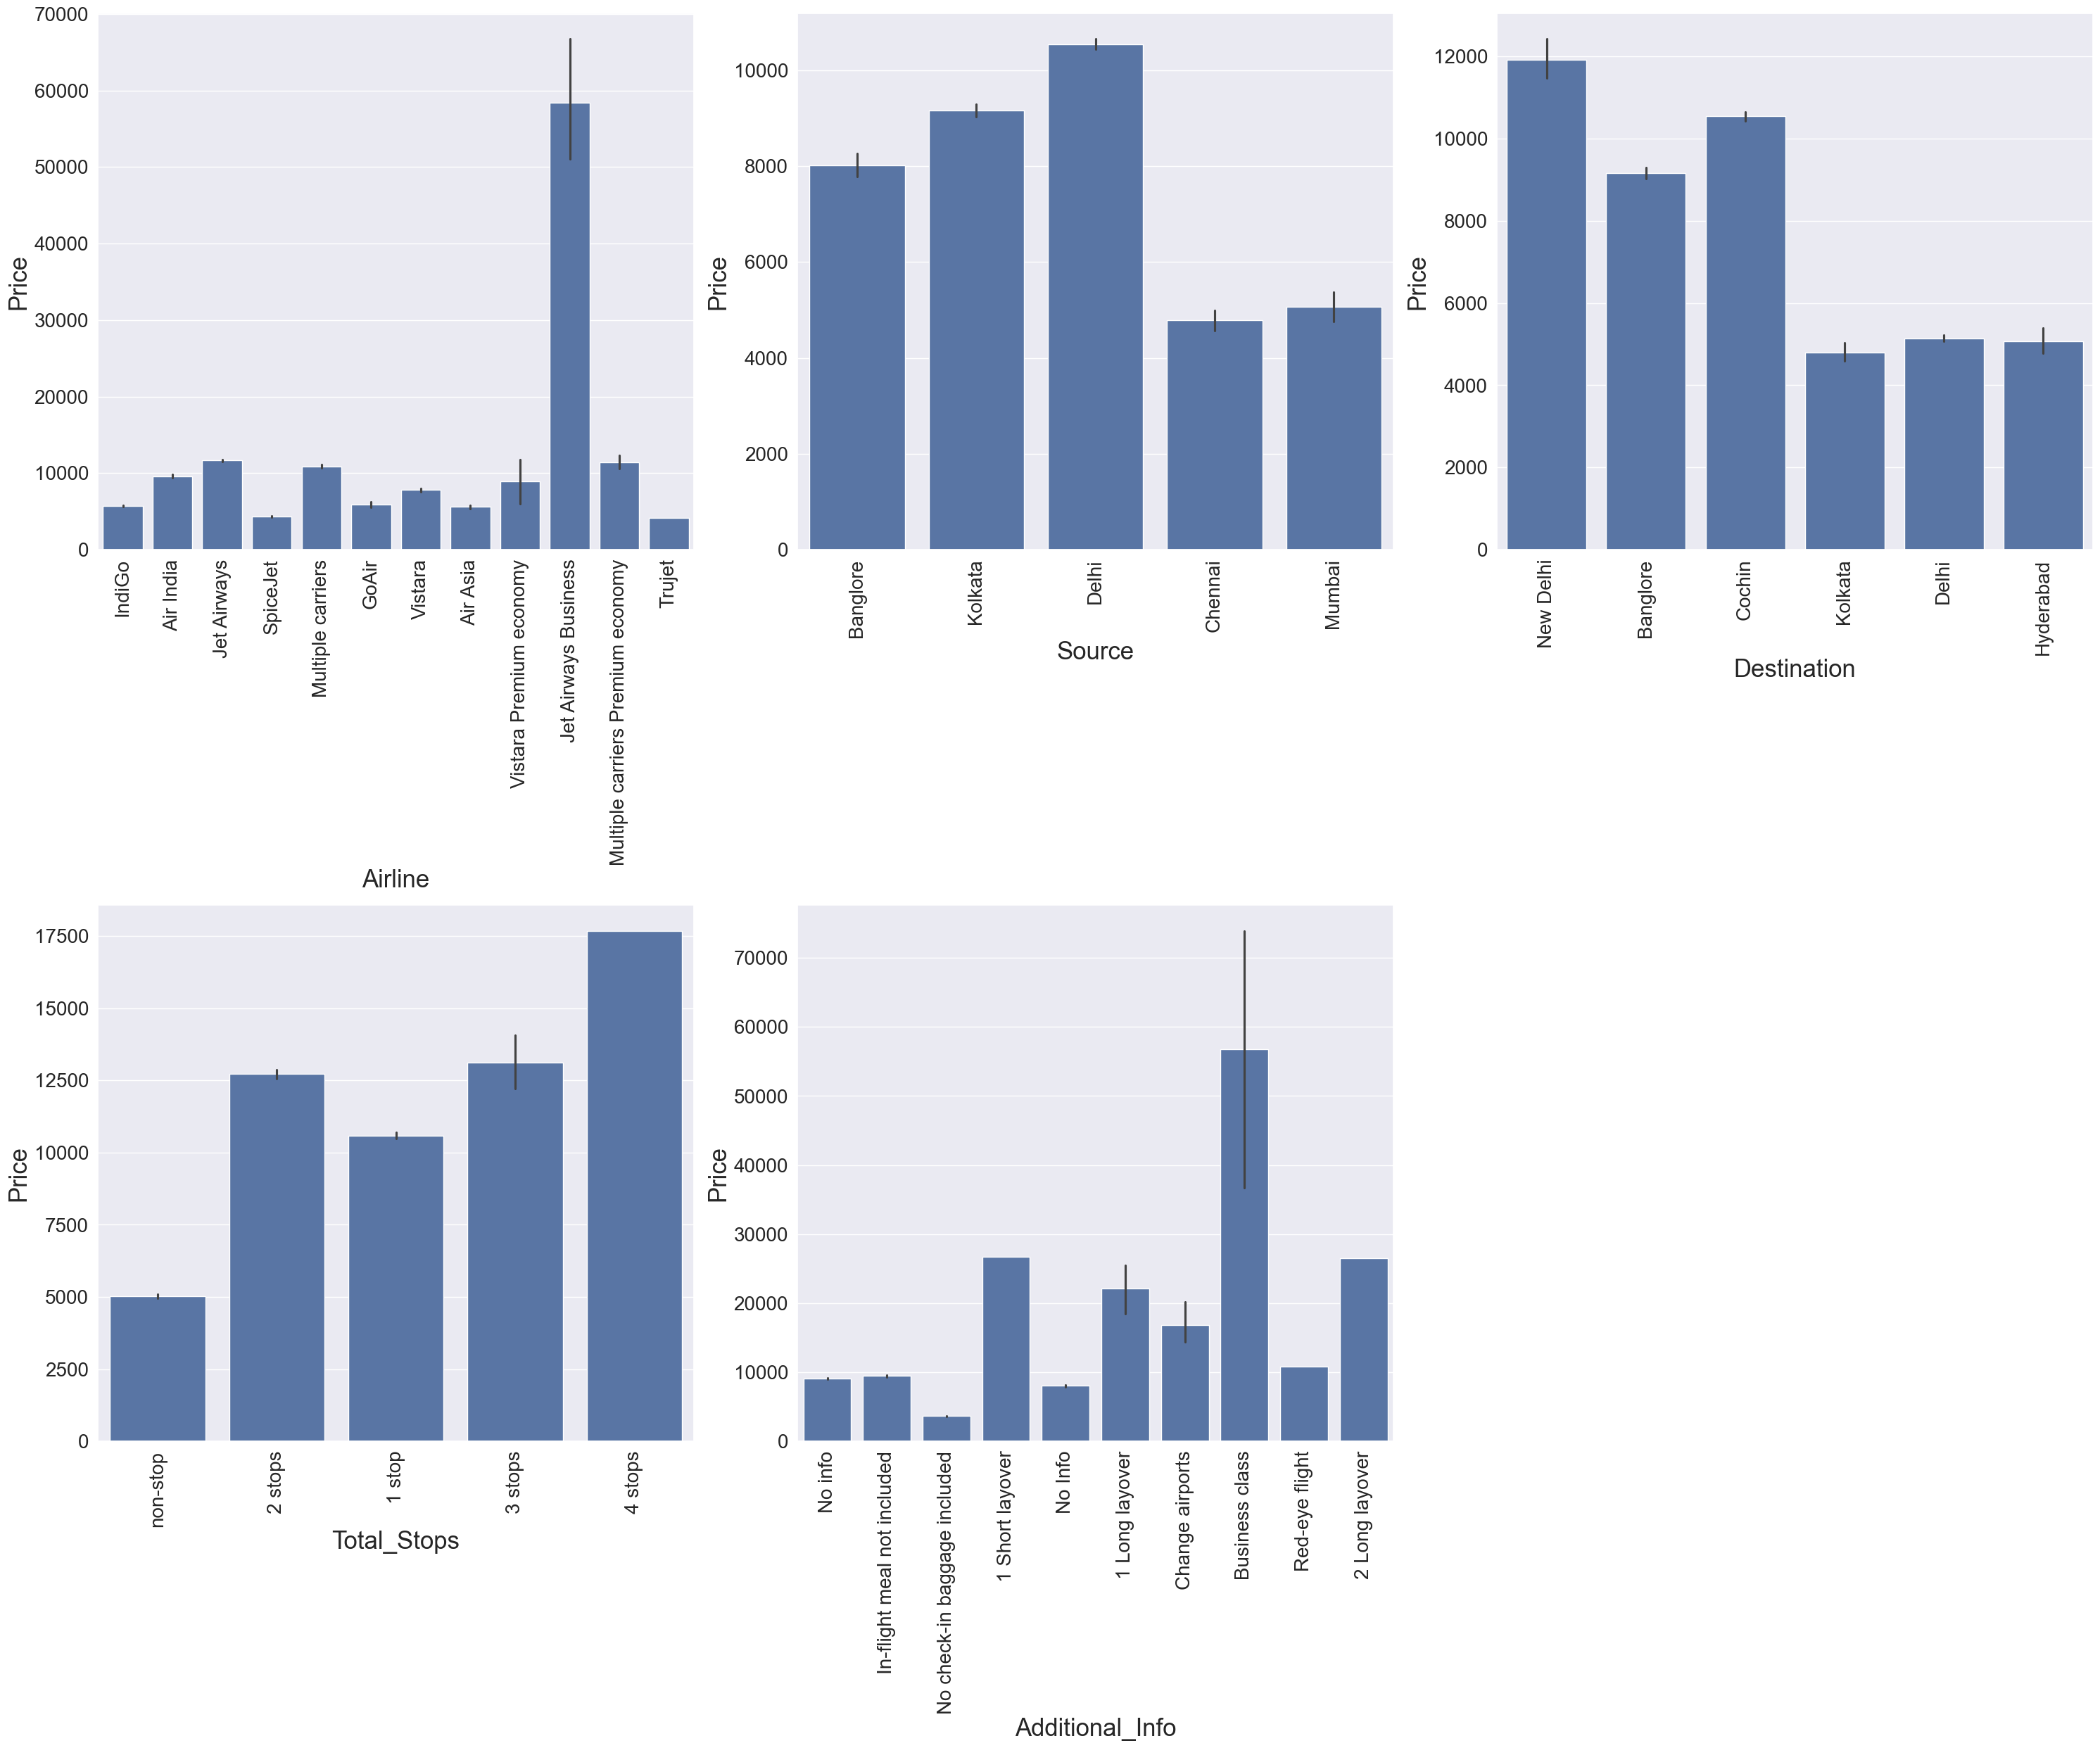

In [18]:
plt.figure(figsize=(30,25))
plotnumber=1
for column in data[['Airline',  'Source', 'Destination', 'Total_Stops','Additional_Info']]:
  ax=plt.subplot(2,3,plotnumber)
  sns.barplot(x=column,y='Price',data=data)
  plt.xticks(fontsize=20,rotation=90)
  plt.yticks(fontsize=20)
  plt.xlabel(column,size=25)
  plt.ylabel('Price',size=25)
  plotnumber+=1
plt.tight_layout()

#### Analysis
* We can see the price is increasing as Total_stops increases.
* Jet Airways business has the highest price.
* Flights taking off from delhi and landing at Delhi has slightly higher prices.

In [19]:
data["Journey_day"]=pd.to_datetime(data["Date_of_Journey"], format="%d/%m/%Y").dt.day

In [20]:
data["Journey_month"] = pd.to_datetime(data["Date_of_Journey"], format= "%d/%m/%Y").dt.month

In [21]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [22]:
data.drop(["Date_of_Journey"], axis=1, inplace=True)

## Data Preprocessing and Feature Engineering

## DEARTURE AND ARRIVAL TIME

In [23]:
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'], format='%H:%M')
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'])
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])
data.dtypes

Airline                    object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Journey_day                 int32
Journey_month               int32
dtype: object

In [24]:
data["Dep_hours"]= pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
data["Arrival_hours"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arrival_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute
                        

In [25]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,2024-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,2024-09-17 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1900-01-01 09:25:00,2024-06-10 04:25:00,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1900-01-01 18:05:00,2024-09-17 23:30:00,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1900-01-01 16:50:00,2024-09-17 21:35:00,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [26]:
data.drop(['Dep_Time', 'Arrival_Time'], axis = 1, inplace=True)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [27]:
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [28]:
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins

In [29]:
data.drop(["Duration"], axis = 1, inplace = True)
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### Handling Categorical Data
once can find ways to handle categorical data. some of the categorical data are
1. NOMINAL DATA which is data that are not in any other, we can use OneHotEncoded to handle this data
2. ORDINAL DATA which is data that are in order data, we can use LabelEncoder to handle this data

In [30]:
data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

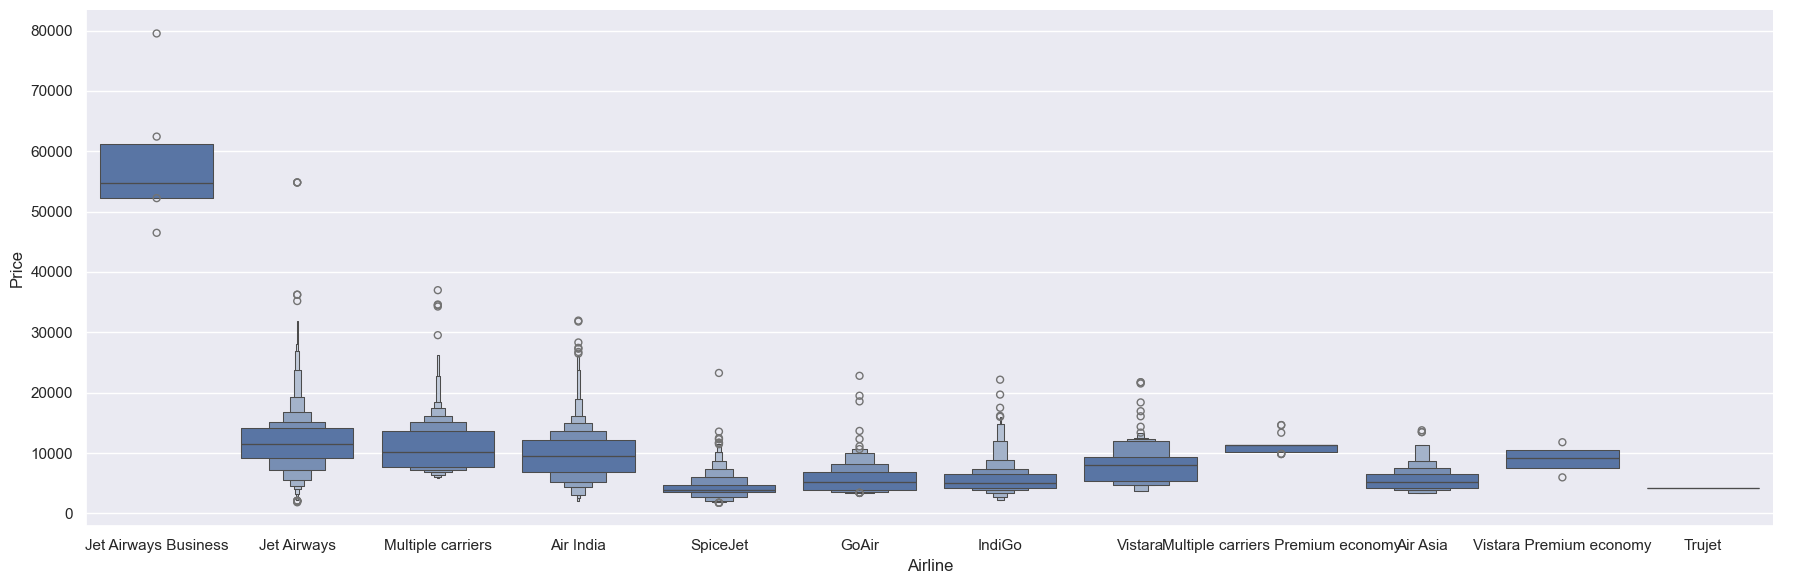

In [31]:
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [32]:
Airline = data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True).astype(int)

Airline.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [33]:
data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [34]:
Source = data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True).astype(int)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [35]:
data["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [36]:
Destination = data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True).astype(int)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [37]:
data["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [38]:
data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [39]:
data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [40]:
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [41]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [42]:
data = pd.concat([data, Airline, Source, Destination], axis = 1)

In [43]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [44]:
data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
data.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hours,Dep_min,Arrival_hours,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
data.shape

(10682, 30)

In [47]:
data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hours',
       'Dep_min', 'Arrival_hours', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [48]:
X = data.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_min',
         'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_min,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,20,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,50,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,25,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,5,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,50,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Feature selection

In [49]:
y= data.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

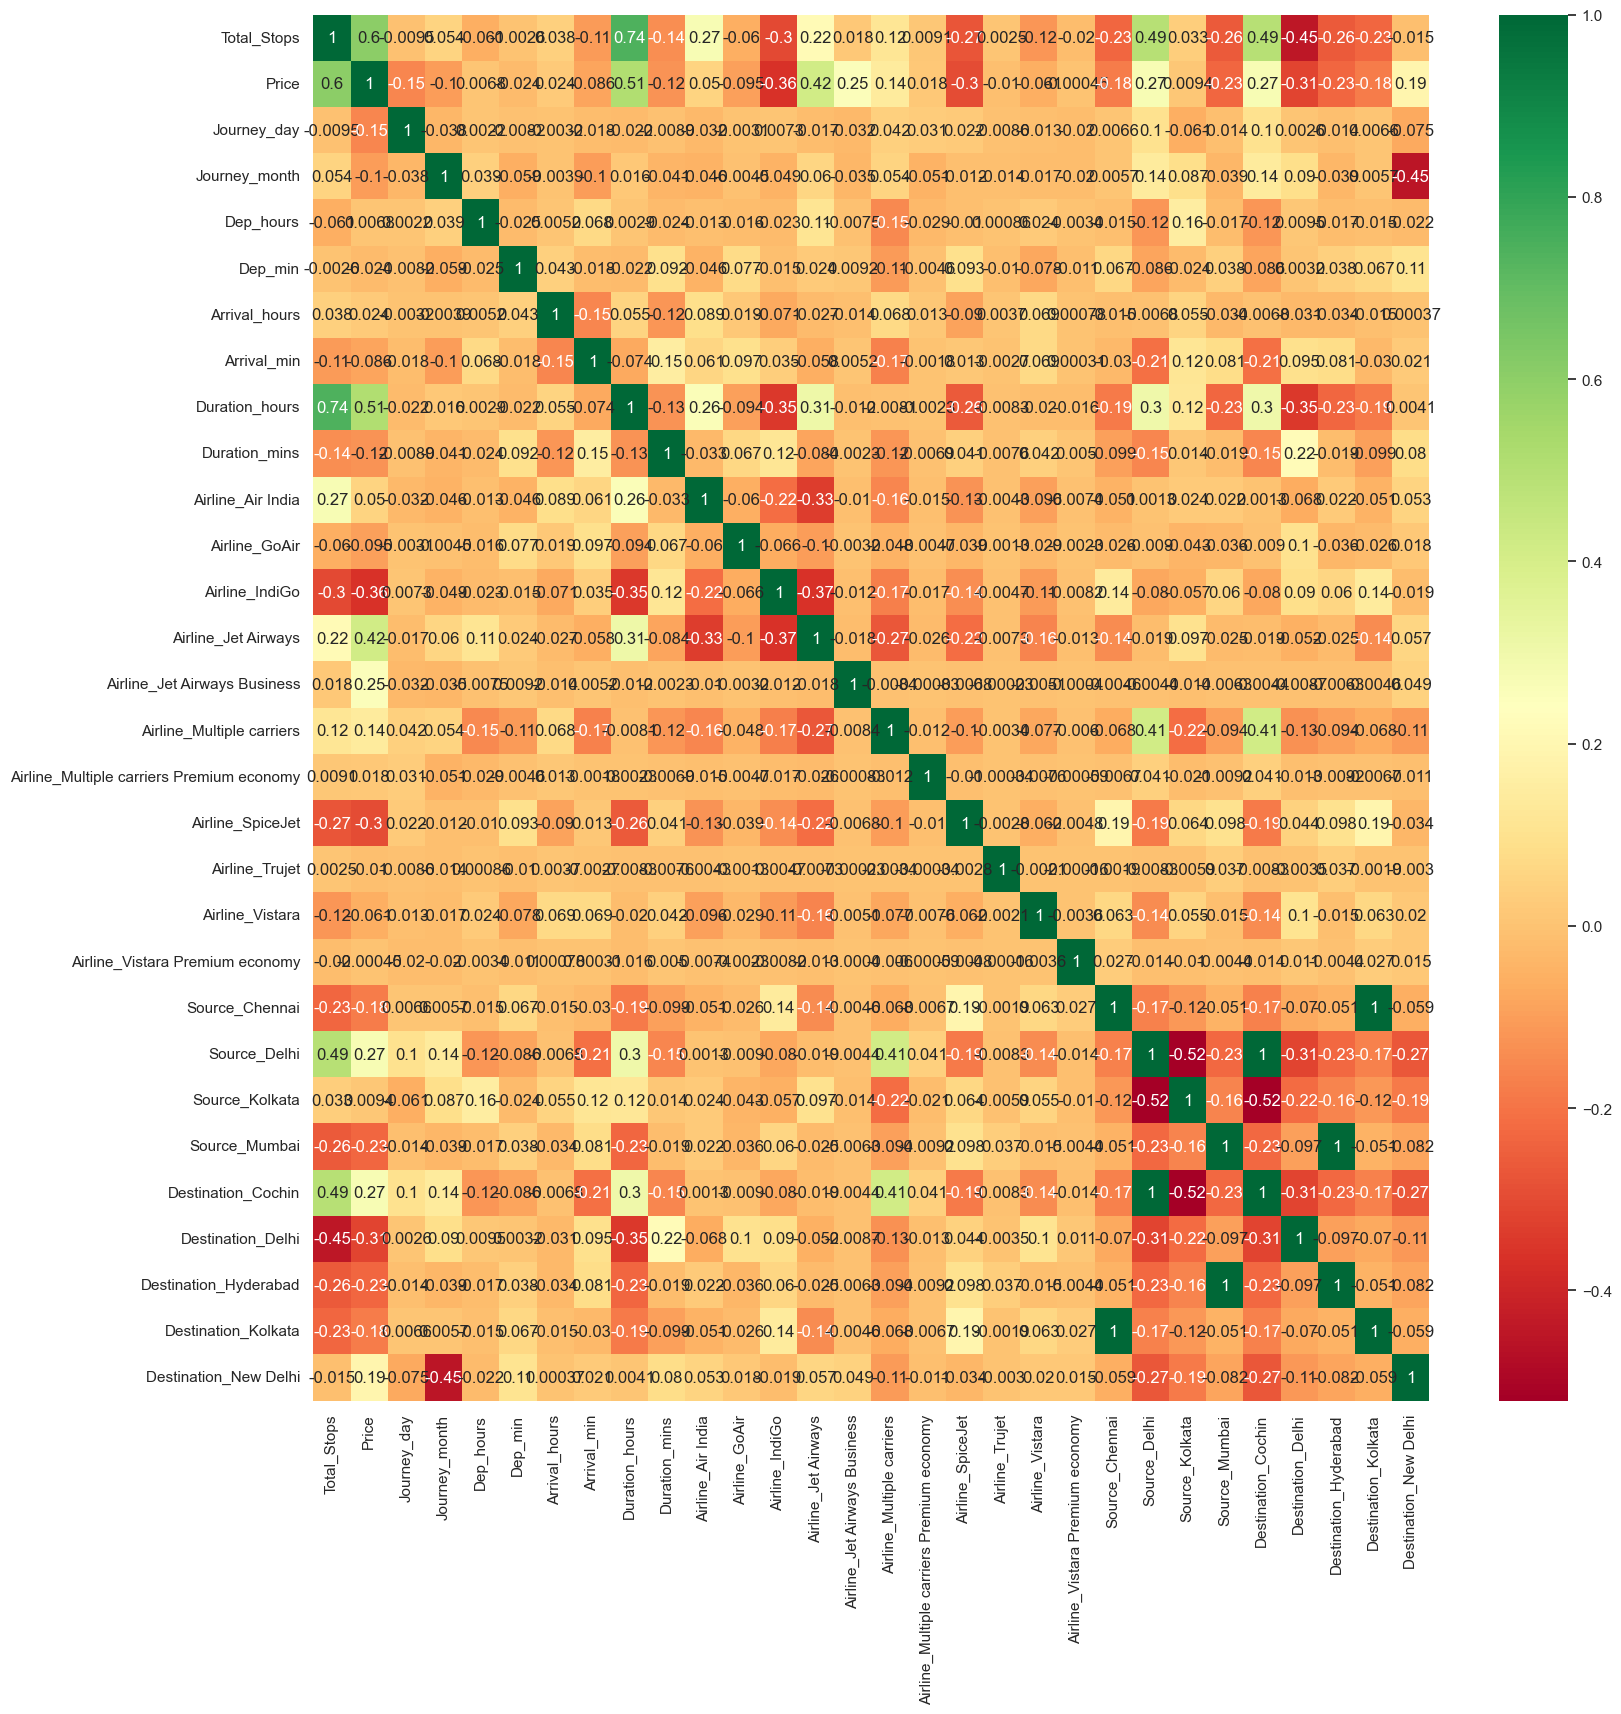

In [50]:
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

#### Comments
* We can see from the heat map that price depends a lot on total_stopss

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [52]:
print(selection.feature_importances_)

[2.28963025e-01 1.42039083e-01 5.47033779e-02 3.22457787e-02
 3.44576765e-02 1.27423685e-01 2.84878453e-02 1.05533923e-02
 1.97201602e-03 1.81802823e-02 1.39227621e-01 6.75132249e-02
 1.81881671e-02 8.77458082e-04 3.13163184e-03 1.06809525e-04
 5.17047119e-03 1.18817904e-04 7.34633633e-04 1.37326749e-02
 2.98688489e-03 7.86423592e-03 1.20236891e-02 1.69492868e-02
 6.84002106e-03 4.41855927e-04 2.50663532e-02]


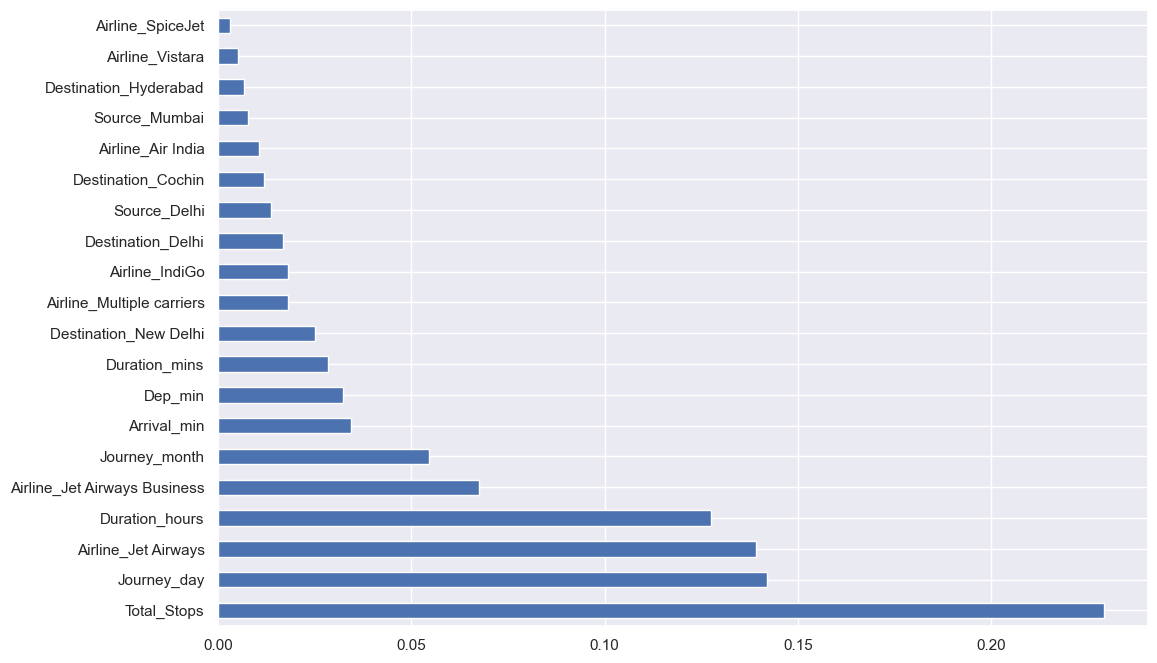

In [53]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [86]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [87]:
y_pred = reg_rf.predict(X_test)

In [88]:
reg_rf.score(X_train, y_train)

0.9536952478538308

In [89]:
reg_rf.score(X_test, y_test)

0.7983444203091601

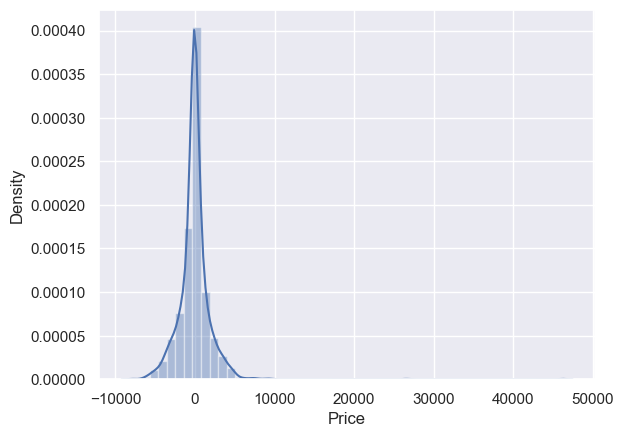

In [90]:
sns.distplot(y_test - y_pred, kde=True)
plt.show()

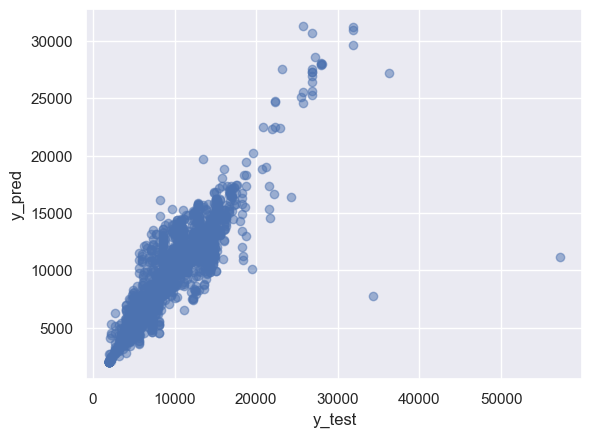

In [91]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Model Creation

In [92]:
# Before model creation we will convert all columns to int because certain models only understands int
data=data.astype(int)

In [93]:
X=data.drop('Price',axis=1)
y=data['Price']

In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [95]:
# defining a function that can give train and test accuracy that can be used for all models for easiness
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
def evaluate_predictions(y_pred_train_m,y_pred_test_m):
  train_r2=r2_score(y_train,y_pred_train_m)
  train_mse=mean_squared_error(y_pred_train_m,y_train)
  train_rmse=mean_squared_error(y_pred_train_m,y_train,squared=False)
  train_mae=mean_absolute_error(y_pred_train_m,y_train)

  test_r2=r2_score(y_test,y_pred_test_m)
  test_mse=mean_squared_error(y_pred_test_m,y_test)
  test_rmse=mean_squared_error(y_pred_test_m,y_test,squared=False)
  test_mae=mean_absolute_error(y_pred_test_m,y_test)

  metrics = {
        'train_r2':train_r2,
        'train_mse':train_mse,
        'train_rmse':train_rmse,
        'train_mae':train_mae,

        'test_r2':test_r2,
        'test_mse':test_mse,
        'test_rmse':test_rmse,
        'test_mae':test_mae,
    }

  return metrics

In [96]:
#Linear Regression
from sklearn.linear_model import LinearRegression

m1=LinearRegression()
m1.fit(X_train,y_train)
y_pred_train_m1=m1.predict(X_train)
y_pred_test_m1=m1.predict(X_test)


In [97]:
#SVR
from sklearn.svm import SVR

m2 = SVR()
m2.fit(X_train, y_train)
y_pred_train_m2 = m2.predict(X_train)
y_pred_test_m2 = m2.predict(X_test)


In [62]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

m3 = DecisionTreeRegressor()
m3.fit(X_train, y_train)
y_pred_train_m3 = m3.predict(X_train)
y_pred_test_m3 = m3.predict(X_test)

evaluate_predictions(y_pred_train_m3, y_pred_test_m3)

{'train_r2': 0.9725638612172446,
 'train_mse': 589536.1838659343,
 'train_rmse': 767.8125968398372,
 'train_mae': 297.22687554612406,
 'test_r2': 0.6993080771922786,
 'test_mse': 6192505.422631869,
 'test_rmse': 2488.474517175506,
 'test_mae': 1373.9651379009113}

In [98]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

m4 = RandomForestRegressor()
m4.fit(X_train, y_train)
y_pred_train_m4 = m4.predict(X_train)
y_pred_test_m4 = m4.predict(X_test)

evaluate_predictions(y_pred_train_m4, y_pred_test_m4)

{'train_r2': 0.9560814639634496,
 'train_mse': 943702.9875443046,
 'train_rmse': 971.4437644785747,
 'train_mae': 561.2325555968811,
 'test_r2': 0.8021470810658964,
 'test_mse': 4074619.836617436,
 'test_rmse': 2018.5687594475041,
 'test_mae': 1186.4432399607547}

In [99]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

m5 = GradientBoostingRegressor() # we can give n_estimators different values in hyperparameter tuning step to improve performance
m5.fit(X_train, y_train)
y_pred_train_m5 = m5.predict(X_train)
y_pred_test_m5 = m5.predict(X_test)

evaluate_predictions(y_pred_train_m5, y_pred_test_m5)

{'train_r2': 0.798612703734743,
 'train_mse': 4327325.32297588,
 'train_rmse': 2080.2224215155165,
 'train_mae': 1486.3218431503094,
 'test_r2': 0.7360372643545798,
 'test_mse': 5436097.706230215,
 'test_rmse': 2331.544060538041,
 'test_mae': 1528.162113099994}

In [100]:
#XGBoost
import xgboost as xgb

m6 = xgb.XGBRegressor()
m6.fit(X_train, y_train)
y_pred_train_m6 = m6.predict(X_train)
y_pred_test_m6 = m6.predict(X_test)

evaluate_predictions(y_pred_train_m6, y_pred_test_m6)

{'train_r2': 0.9334400845176454,
 'train_mse': 1430211.4041123714,
 'train_rmse': 1195.9144635434307,
 'train_mae': 825.7091470998618,
 'test_r2': 0.8189149905624341,
 'test_mse': 3729298.387627572,
 'test_rmse': 1931.1391424823773,
 'test_mae': 1176.7843794970868}

In [101]:
models=['Linear Regression','SVR','Decision Tree','Random Forest','Gradient Boosting','XGBoost']
test_r2_scores=[evaluate_predictions(y_pred_train_m1, y_pred_test_m1)['test_r2'],
           evaluate_predictions(y_pred_train_m2, y_pred_test_m2)['test_r2'],
           evaluate_predictions(y_pred_train_m3, y_pred_test_m3)['test_r2'],
           evaluate_predictions(y_pred_train_m4, y_pred_test_m4)['test_r2'],
           evaluate_predictions(y_pred_train_m5, y_pred_test_m5)['test_r2'],
           evaluate_predictions(y_pred_train_m6, y_pred_test_m6)['test_r2']
           ]
train_r2_scores=[evaluate_predictions(y_pred_train_m1, y_pred_test_m1)['train_r2'],
           evaluate_predictions(y_pred_train_m2, y_pred_test_m2)['train_r2'],
           evaluate_predictions(y_pred_train_m3, y_pred_test_m3)['train_r2'],
           evaluate_predictions(y_pred_train_m4, y_pred_test_m4)['train_r2'],
           evaluate_predictions(y_pred_train_m5, y_pred_test_m5)['train_r2'],
           evaluate_predictions(y_pred_train_m6, y_pred_test_m6)['train_r2']
           ]

In [102]:
pd.DataFrame({'Models':models,'train_r2_scores':train_r2_scores,'test_r2_scores':test_r2_scores})

,Models,train_r2_scores,test_r2_scores
0,Linear Regression,0.636642,0.580717
1,SVR,0.002772,-0.000050
2,Decision Tree,0.972564,0.699308
3,Random Forest,0.956081,0.802147
4,Gradient Boosting,0.798613,0.736037
5,XGBoost,0.933440,0.818915


In [103]:
from sklearn.model_selection import cross_val_score
sc=cross_val_score(m6,X,y,cv=5,scoring='r2')

In [104]:
sc

array([0.84527923, 0.85439401, 0.86155142, 0.84793369, 0.82613957])

In [105]:
sc.mean()

0.8470595821695983

* We can see the xgboost model m6 generalises well

## Hyperparameter Tuning
* choose following for hyperparameter tuning
   1. RandomizedSearchCV ---> Fast
   2. GridSearchCV
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramteres and best score

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [107]:
#Randomized Search CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop =1200, num=12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]
             

In [108]:
# create the random grid
random_gride = {'n_estimators': n_estimators,
                'max_features' : max_features,
                'max_depth' : max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf' : min_samples_leaf}

In [109]:
# Random Search of parameters, using 5 fold cross validation,
# Search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_gride, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose = 2, random_state=42, n_jobs =1)

In [110]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  11.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

* we can see the hyperparameters of the best performing model

In [111]:
# Lets create a XGBRegressor model with the hyperparameters we got from grid searchCV and see if the overall performance is increasing
import xgboost as xgb

m7 = xgb.XGBRegressor(learning_rate= 0.1, max_depth= 6, n_estimators= 200)
m7.fit(X_train, y_train)
y_pred_train_m7 = m7.predict(X_train)
y_pred_test_m7 = m7.predict(X_test)

evaluate_predictions(y_pred_train_m7, y_pred_test_m7)

{'train_r2': 0.9150000896968649,
 'train_mse': 1826442.2390425198,
 'train_rmse': 1351.4592998098462,
 'train_mae': 937.5237784313658,
 'test_r2': 0.8211794000407704,
 'test_mse': 3682664.717382219,
 'test_rmse': 1919.0270236195788,
 'test_mae': 1180.601621135796}

* we can see that for m7 the test_r2 has increased slightly to 93%

In [112]:
# Lets use cv for m7
# lets use cross validation to see if the model generalises well using cross validation
from sklearn.model_selection import cross_val_score
sc=cross_val_score(m7,X,y,cv=5,scoring='r2')
sc

array([0.83235078, 0.84783976, 0.86941016, 0.84883626, 0.83273454])

In [113]:
sc.mean()

0.8462342999752834

* both m6 and m7 gives similar results in evalutaion
* m7 gives lower variance ie the difference between the training and test r2_score is much lower so m7 does a better job in generalization

In [116]:
## lets create a model comparison report of all models we made
Algorithms=['Linear Regression','SVR','Decision Tree','Random Forest','Gradient Boosting','XGBoost','XGBoost with tuning']
models=['m1','m2','m3','m4','m5','m6','m7']
test_r2_scores=[evaluate_predictions(y_pred_train_m1, y_pred_test_m1)['test_r2'],
           evaluate_predictions(y_pred_train_m2, y_pred_test_m2)['test_r2'],
           evaluate_predictions(y_pred_train_m3, y_pred_test_m3)['test_r2'],
           evaluate_predictions(y_pred_train_m4, y_pred_test_m4)['test_r2'],
           evaluate_predictions(y_pred_train_m5, y_pred_test_m5)['test_r2'],
           evaluate_predictions(y_pred_train_m6, y_pred_test_m6)['test_r2'],
           evaluate_predictions(y_pred_train_m7, y_pred_test_m7)['test_r2']
           ]
train_r2_scores=[evaluate_predictions(y_pred_train_m1, y_pred_test_m1)['train_r2'],
           evaluate_predictions(y_pred_train_m2, y_pred_test_m2)['train_r2'],
           evaluate_predictions(y_pred_train_m3, y_pred_test_m3)['train_r2'],
           evaluate_predictions(y_pred_train_m4, y_pred_test_m4)['train_r2'],
           evaluate_predictions(y_pred_train_m5, y_pred_test_m5)['train_r2'],
           evaluate_predictions(y_pred_train_m6, y_pred_test_m6)['train_r2'],
           evaluate_predictions(y_pred_train_m7, y_pred_test_m7)['train_r2']
           ]

cross_val_scores=[cross_val_score(m1,X,y,cv=5,scoring='r2').mean(),
                  cross_val_score(m2,X,y,cv=5,scoring='r2').mean(),
                  cross_val_score(m3,X,y,cv=5,scoring='r2').mean(),
                  cross_val_score(m4,X,y,cv=5,scoring='r2').mean(),
                  cross_val_score(m5,X,y,cv=5,scoring='r2').mean(),
                  cross_val_score(m6,X,y,cv=5,scoring='r2').mean(),
                  cross_val_score(m7,X,y,cv=5,scoring='r2').mean(),
                  ]

In [122]:
train_r2_scores# r2 scores of all different models

[0.636641527073251,
 0.0027721460885204996,
 0.9725638612172446,
 0.9560814639634496,
 0.798612703734743,
 0.9334400845176454,
 0.9150000896968649]

### Model Comparison report

In [119]:
comparison_report=pd.DataFrame({'Algorithm':Algorithms,
                                'Models':models,
                                'train_r2_scores':train_r2_scores,
                                'test_r2_scores':test_r2_scores,
                                'Cross_val_scores':cross_val_scores}).sort_values('test_r2_scores',ascending=False)
comparison_report

,Algorithm,Models,train_r2_scores,test_r2_scores,Cross_val_scores
6,XGBoost with tuning,m7,0.915000,0.821179,0.846234
5,XGBoost,m6,0.933440,0.818915,0.847060
3,Random Forest,m4,0.956081,0.802147,0.812606
4,Gradient Boosting,m5,0.798613,0.736037,0.768856
2,Decision Tree,m3,0.972564,0.699308,0.702052
0,Linear Regression,m1,0.636642,0.580717,0.619903
1,SVR,m2,0.002772,-0.000050,0.003759


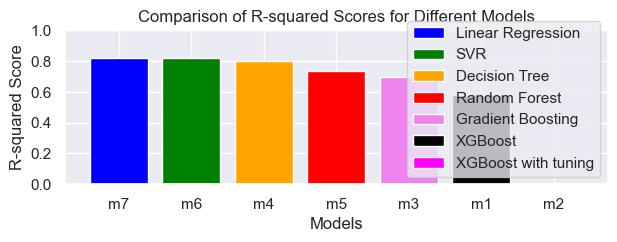

In [120]:
# comparison graph of test r2 score
plt.figure(figsize=(7,2))
plt.bar(comparison_report['Models'], comparison_report['test_r2_scores'],color=['blue', 'green', 'orange','red','violet','black','magenta'],label=Algorithms )
plt.legend()
plt.title('Comparison of R-squared Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1 for R2 scores
plt.show()


### Conclusion
* Both m3 and m4 performs well
* From the model comparison report , we can conclude that the r2_scores of m7 is performing well and does not overfit and performs well even with cross validation
* We can chose m7 as our final model ie XGBOOST with hyperparameter tuning